In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cellular Automata

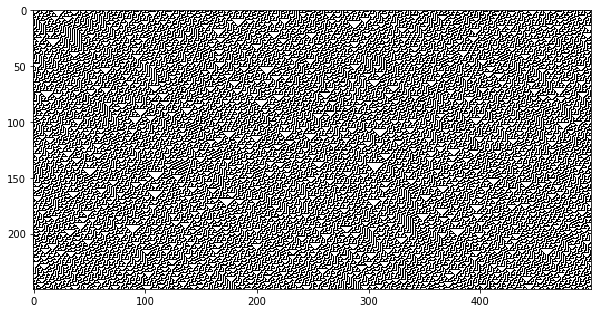

In [2]:
F = {
    (0,0,0):0,
    (0,0,1):1,
    (0,1,0):1,
    (1,0,0):1,
    (0,1,1):1,
    (1,1,0):0,
    (1,0,1):0,
    (1,1,1):0,
}

N = 500

M = np.zeros((N//2,N))
# M[0,N//2] = 1
M[0] = np.random.random(size=N).round(0)

for rowi in range(0,(N//2)-1):
    for coli in range(0,N):
        M[rowi+1, (coli+1)%N] = F[
            M[rowi,(coli)%N],
            M[rowi,(coli+1)%N],
            M[rowi,(coli+2)%N],
        ]

plt.figure(figsize=(10,10))
plt.imshow(M, interpolation="none", cmap="Greys")
plt.show()

# Perculations

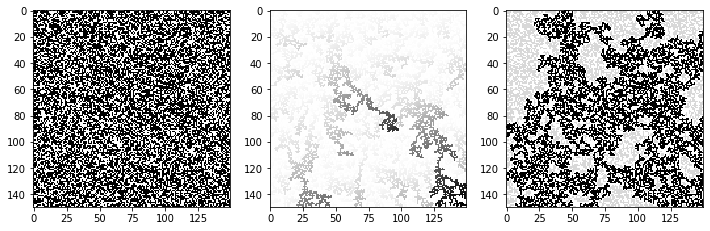

In [56]:
N = 150
p = 0.40
L = np.random.random(size=(N,N))
L = np.where(L>p, 1, 0)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax1.imshow(L, interpolation="none", cmap="Greys")

for i in range(N):
    for j in range(N):
        if i == N-1 or j == N-1 or i == 0 or j == 0 or L[i,j] == 0:
                continue
        else:
            L[i,j] = max(
                L[i+1,j],
                L[i,j+1],
                L[i-1,j],
                L[i,j-1],
            )
            L[i,j] += (
                int(L[i+1,j]>0) + int(L[i-1,j]>0) + 
                int(L[i,j+1]>0) + int(L[i,j-1]>0)
            )
            if L[i+1,j] != 0: L[i+1,j] = L[i,j]
            if L[i,j+1] != 0: L[i,j+1] = L[i,j]
            if L[i-1,j] != 0: L[i-1,j] = L[i,j]
            if L[i,j-1] != 0: L[i,j-1] = L[i,j]

ax2.imshow(L, interpolation="none", cmap="Greys")

x, y = np.unravel_index(np.argmax(L), shape=L.shape)
maxx = np.max(L) + 1
L[x,y] = maxx

todo = set([(x,y)])
done = set([])

while todo:
    (i,j) = todo.pop()
    done.add((i,j))
    if i == N or j == N or i == -1 or j == -1 or L[i,j] == 0:
        continue
    else:
        L[i,j] = maxx
        neighbours = {(i+1,j), (i,j+1), (i-1,j), (i,j-1)}
        todo = todo | neighbours  # add neighbours to todo
        todo = todo - done  # remove dones from todo

L = np.where((L>0) & (L<maxx), 1, L)
L = np.where((L==maxx), 4, L)

ax3.imshow(L, interpolation="none", cmap="Greys")
plt.show()